In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
file1_path = r'D:\pythonProject\pyde-learning\Machine-learning-demo\音乐网站流量建模\CustBehavior.csv'
file2_path = r'D:\pythonProject\pyde-learning\Machine-learning-demo\音乐网站流量建模\TrainFlag.csv'
file3_path = r'D:\pythonProject\pyde-learning\Machine-learning-demo\音乐网站流量建模\TestPRED.csv'
df = pd.read_csv(file1_path, encoding='utf-8')
flag_df = pd.read_csv(file2_path, encoding='utf-8')
test_pred_df = pd.read_csv(file3_path, encoding='utf-8')

In [7]:
# 用户每月消费总费用（总费用）
df['ALL_TOTAL_FEE'] = df['FEE1'] + df['FEE2'] + df['FEE3'] + df['FEE4'] + df['FEE5'] + df['FEE6'] + df['TOTAL_FEE']

# 下载音乐，副本总费用
df['SONG_COS_TOTAL_FEE'] = df['SONG_TOTAL_FEE'] + df['COS_TOTAL_FEE']

# 下载歌曲总费用（下载费用占总费用的比例）
df['SONG_TOTAL_FEE_RATIO'] = df['SONG_TOTAL_FEE'] / df['ALL_TOTAL_FEE']

# 用户每月试听歌曲次数和下载歌曲次数总和
df['SONG_LIS_DOW_NUM'] = df['SONG_DOW_NUM'] + df['SONG_LIS_NUM']

# 账户充值总费用（充值费用占总费用的比例）
df['INV_TOTAL_FEE_RATIO'] = df['INV_TOTAL_FEE'] / df['ALL_TOTAL_FEE']

# 每月购买次数（用户每月的购买次数）
df['MONTHLY_PURCHASES'] = df['PURCHASES']

# 每月充值最低金额（用户每月充值的最低金额）
df['MONTHLY_MIN_DUE'] = df['MIN_DUE']

# 月底账户余额（用户每月的账户余额）
df['MONTHLY_CLOSE_BAL'] = df['CLOSE_BAL']

# 用户每月消费正负标识
df['IS_CLSBLAL'] = df['CLSBAL_FLAG'].apply(lambda x: 1 if x == '+' else 0)

# 用户是否为会员
df['OPBAL_FLAG'] = df['OPBAL_FLAG'].apply(lambda x: 1 if x == '+' else 0)

# 账户新增消费金额占预消费最大额度
df['PRE_LIMIT_USAGE_RATIO'] = df['INSTL_AMT'] / df['PRE_LIMIT_FEE']

# 账户每月消费总费用占预消费最大额度
df['MONTHLY_TOTAL_FEE_RATIO'] = df['ALL_TOTAL_FEE'] / df['PRE_LIMIT_FEE']

# 每月利息总计（充值次数）
df['MONTHLY_INT_CUNOT'] = df['INT_CUNOT']

# 每月剩余值和使用值总和
df['MONTHLY_INT_NUM'] = df['INT_CHDCMP'] + df['INT_CHDCMP']

# 每月预消费还款金额
df['MONTHLY_PAYMENT'] = df['PAYMENT']

# 每月预消费还款金额占预消费最大额度
df['MONTHLY_PAYMENT_RATIO'] = df['PAYMENT'] / df['PRE_LIMIT_FEE']

# 推荐成功返费金额
df['MONTHLY_BAL_MP'] = df['BAL_MP']

# 本月消费笔数
df['NEW_CASH_ACC'] = df['NBR_CASHAD_NEW']

# 平均6月消费和退费的次数差
df['NEW_CASH_ACC'] = df['NBR_PURCH_NEW'] - df['MTHS_ODUE']

# 20. 历史数据特征（用户历史最大消费金额）
#df['HIST_MAX_TOTAL_FEE'] = df.groupby('ACCOUNT')['TOTAL_FEE'].transform('max')

# 21. 用户历史最大下载次数
#df['HIST_MAX_SONG_LIS_NUM'] = df.groupby('ACCOUNT')['SONG_LIS_NUM'].transform('max')

# 22. 用户历史最大充值金额
#df['HIST_MAX_INV_TOTAL_FEE'] = df.groupby('ACCOUNT')['INV_TOTAL_FEE'].transform('max')

In [11]:
# 保存新构造的特征数据
# df.to_csv('D:\pythonProject\pyde-learning\Machine-learning-demo\音乐网站流量建模\CustBehavior_Features.csv', index=False)

In [8]:
# 合并训练数据和标签
train_df = pd.merge(df, flag_df, on='ACCOUNT')

In [9]:
train_df.head()

,ACCOUNT,FEE1,FEE2,FEE3,FEE4,FEE5,FEE6,TOTAL_FEE,SONG_LIS_NUM,SONG_DOW_NUM,...,MONTHLY_INT_CUNOT,MONTHLY_INT_NUM,MONTHLY_PAYMENT,MONTHLY_PAYMENT_RATIO,MONTHLY_BAL_MP,NEW_CASH_ACC,SONG_LIS_DOW_NUM,MONTHLY_TOTAL_FEE_RATIO,DAY_OPENED,BAD_FLAG
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.330408,0.678034,0.0,...,0.0,1.117933,0.649937,0.906627,0.0,4,0.678034,0.460902,20190430,0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.339423,0.648463,0.0,...,0.0,1.148435,0.682870,0.952566,0.0,1,0.648463,0.473477,20190430,0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.321717,0.682126,0.0,...,0.0,1.088526,0.639217,0.891673,0.0,1,0.682126,0.448778,20190430,0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.638989,0.0,...,0.0,0.000000,0.669307,0.933646,0.0,1,0.638989,0.000000,20190430,0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.308998,0.669116,0.0,...,0.0,1.045490,0.625933,0.873142,0.0,2,0.669116,0.431035,20190430,0


In [10]:
# 特征和标签
features = [
    'ALL_TOTAL_FEE', 'SONG_COS_TOTAL_FEE', 'SONG_TOTAL_FEE_RATIO', 'SONG_LIS_DOW_NUM',
    'INV_TOTAL_FEE_RATIO', 'MONTHLY_PURCHASES', 'MONTHLY_MIN_DUE', 'MONTHLY_CLOSE_BAL',
    'IS_CLSBLAL', 'OPBAL_FLAG', 'PRE_LIMIT_USAGE_RATIO', 'MONTHLY_TOTAL_FEE_RATIO',
    'MONTHLY_INT_CUNOT', 'MONTHLY_INT_NUM', 'MONTHLY_PAYMENT_RATIO', 'MONTHLY_BAL_MP',
    'NEW_CASH_ACC', 'NEW_CASH_ACC'
]


In [11]:
# 设置可视化风格
sns.set(style='whitegrid')

# # 散点图
# plt.figure(figsize=(16, 12))
# for i, feature in enumerate(train_df.columns[:-1]):
#     if i % 2 == 0 and i + 1 < len(train_df.columns[:-1]):
#         plt.subplot(6, 4, i + 1)
#         sns.scatterplot(x=train_df.columns[i], y=train_df.columns[i + 1], hue='BAD_FLAG', data=train_df)
#         plt.title(f'{train_df.columns[i]} vs {train_df.columns[i + 1]} Scatter Plot')
#
# plt.tight_layout()
# plt.show()

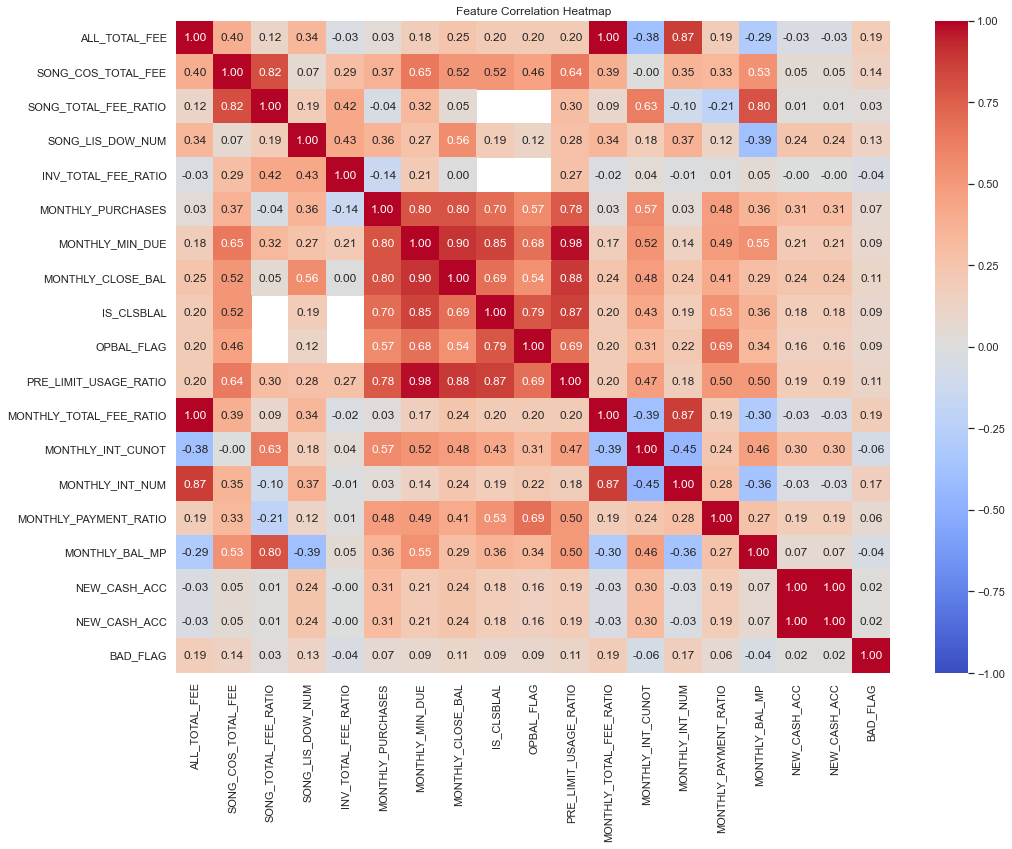

In [12]:
# 热力图
# 计算相关矩阵
corr = train_df[features + ['BAD_FLAG']].corr()

# 绘制热力图
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

In [13]:
# 计算特征与BAD_FLAG的相关性
correlation = corr['BAD_FLAG']

# 设置相关性阈值
threshold = 0.0

# 筛选出相关性高于阈值的特征
selected_features = correlation[correlation.abs() > threshold].index.tolist()
selected_features.remove('BAD_FLAG')

print(f"Selected Features (correlation > {threshold}): {selected_features}")

Selected Features (correlation > 0.0): ['ALL_TOTAL_FEE', 'SONG_COS_TOTAL_FEE', 'SONG_TOTAL_FEE_RATIO', 'SONG_LIS_DOW_NUM', 'INV_TOTAL_FEE_RATIO', 'MONTHLY_PURCHASES', 'MONTHLY_MIN_DUE', 'MONTHLY_CLOSE_BAL', 'IS_CLSBLAL', 'OPBAL_FLAG', 'PRE_LIMIT_USAGE_RATIO', 'MONTHLY_TOTAL_FEE_RATIO', 'MONTHLY_INT_CUNOT', 'MONTHLY_INT_NUM', 'MONTHLY_PAYMENT_RATIO', 'MONTHLY_BAL_MP', 'NEW_CASH_ACC', 'NEW_CASH_ACC']


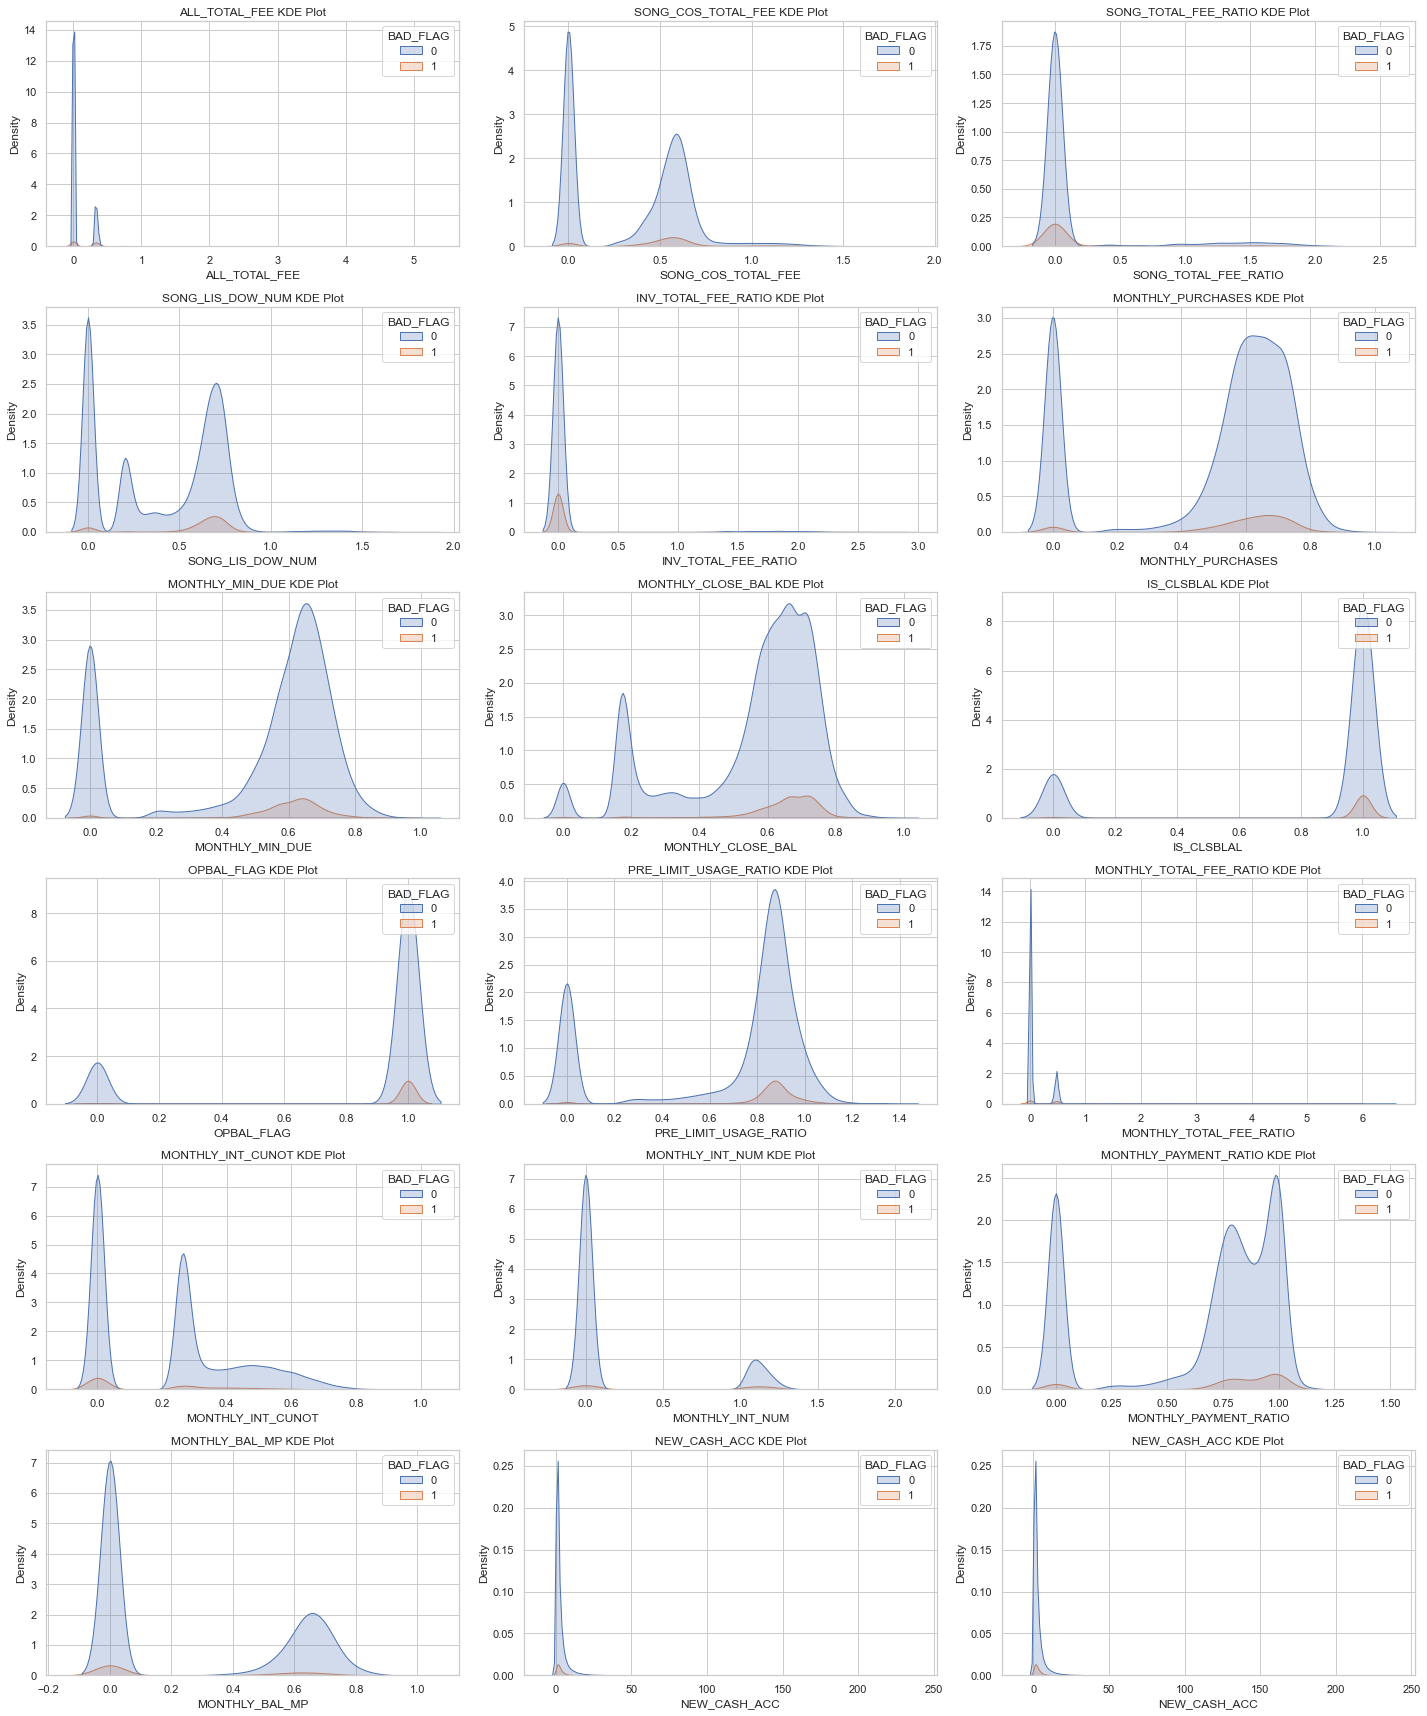

In [16]:
# 绘制kdeplot
fig, axes = plt.subplots(6, 3, figsize=(20, 24))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.kdeplot(data=train_df, x=feature, hue='BAD_FLAG', fill=True, ax=axes[i])
    axes[i].set_title(f'{feature} KDE Plot')

plt.tight_layout()
plt.show()

In [30]:
# 根据KDE图进一步筛选特征
normal_features = [
    'SONG_TOTAL_FEE_RATIO', 'MONTHLY_SONG_LIS_NUM', 'MONTHLY_PURCHASES', 'MONTHLY_MIN_DUE',
    'MONTHLY_CLOSE_BAL', 'IS_CLSBLAL', 'PRE_LIMIT_USAGE_RATIO', 'MONTHLY_INT_CUNOT',
    'MONTHLY_INT_NUM', 'MONTHLY_BAL_MP'
]

# 结合相关性筛选和KDE图筛选的特征
final_features = list(set(selected_features) & set(normal_features))

print(f"Final Selected Features: {final_features}")

Final Selected Features: ['SONG_TOTAL_FEE_RATIO', 'IS_CLSBLAL', 'MONTHLY_INT_NUM', 'MONTHLY_INT_CUNOT', 'MONTHLY_MIN_DUE', 'MONTHLY_CLOSE_BAL', 'MONTHLY_PURCHASES', 'MONTHLY_BAL_MP', 'PRE_LIMIT_USAGE_RATIO']


In [31]:
X = train_df[final_features]
y = train_df['BAD_FLAG']

# 处理NaN值和无穷大值
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)

d:\program files\python36\lib\site-packages\pandas\core\frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
d:\program files\python36\lib\site-packages\pandas\core\frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [53]:
# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# 训练GBDT模型
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [59]:
# 验证模型
y_val_pred = model.predict(X_val)
print('Validation Accuracy:', accuracy_score(y_val, y_val_pred))

Validation Accuracy: 0.9369573691484461


In [60]:
# 预测测试集
# 确保测试集中包含所有训练集使用的特征
test_pred_features_df = pd.merge(test_pred_df[['ACCOUNT']], df[['ACCOUNT'] + final_features], on='ACCOUNT', how='left')

MemoryError: Unable to allocate 5.06 GiB for an array with shape (678501857,) and data type int64

In [51]:
test_pred_df.head()

,ACCOUNT,SONG_TOTAL_FEE_RATIO,IS_CLSBLAL,MONTHLY_INT_NUM,MONTHLY_INT_CUNOT,MONTHLY_MIN_DUE,MONTHLY_CLOSE_BAL,MONTHLY_PURCHASES,MONTHLY_BAL_MP,PRE_LIMIT_USAGE_RATIO
0,15000,NaN,1,0.0,0.659444,0.684871,0.768859,0.770094,0.0,0.832746
1,15000,NaN,1,0.0,0.580190,0.613033,0.705472,0.706605,0.0,0.745397
2,15000,NaN,1,0.0,0.667944,0.668883,0.754768,0.755980,0.0,0.813307
3,15000,NaN,1,0.0,0.555426,0.615891,0.707999,0.709136,0.0,0.748873
4,15000,NaN,1,0.0,0.612729,0.643478,0.732360,0.733536,0.0,0.782416


In [42]:
# 检查合并后是否有缺失记录
missing_accounts = test_pred_df['ACCOUNT'].isnull().sum()
print(f"Missing accounts after merge: {missing_accounts}")

Missing accounts after merge: 0


In [43]:
# 如果有缺失记录，确保行为数据和测试数据的一致性
if missing_accounts > 0:
    # 获取未匹配的账户
    unmatched_accounts = test_pred_df[test_pred_df['ACCOUNT'].isnull()]
    print(f"Unmatched accounts: {unmatched_accounts}")


In [44]:
X_test = test_pred_df[final_features]

In [45]:
# 处理测试集中的NaN值和无穷大值
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.fillna(0, inplace=True)

d:\program files\python36\lib\site-packages\pandas\core\frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
d:\program files\python36\lib\site-packages\pandas\core\frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [46]:
# 确认X_test的长度与test_pred_df的长度一致
assert len(X_test) == len(test_pred_df), "Lengths of X_test and test_pred_df do not match"

In [47]:
test_pred_df['Y_PRED'] = model.predict_proba(X_test)[:, 1]

In [52]:
# 保存预测结果
test_pred_df[['ACCOUNT', 'DAY_OPENED', 'Y_PRED']].to_csv('D:\pythonProject\pyde-learning\Machine-learning-demo\音乐网站流量建模\TestPRED_with_predictions.csv', index=False)


KeyError: "['DAY_OPENED', 'Y_PRED'] not in index"

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
# 使用K折交叉验证，与上面划分训练集与验证集运行一个就行
# 划分训练集和验证集
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 使用GBDT模型
model_gbdt = GradientBoostingClassifier()
scores_gbdt = cross_val_score(model_gbdt, X, y, cv=kf, scoring='accuracy')
print(f'GBDT Cross-Validation Accuracy: {scores_gbdt.mean()}')

# 使用XGBoost模型
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=len(y[y==0]) / len(y[y==1]))
scores_xgb = cross_val_score(model_xgb, X, y, cv=kf, scoring='accuracy')
print(f'XGBoost Cross-Validation Accuracy: {scores_xgb.mean()}')

# 使用LightGBM模型
model_lgb = lgb.LGBMClassifier(scale_pos_weight=len(y[y==0]) / len(y[y==1]))
scores_lgb = cross_val_score(model_lgb, X, y, cv=kf, scoring='accuracy')
print(f'LightGBM Cross-Validation Accuracy: {scores_lgb.mean()}')

# 选择一个模型进行预测（这里以LightGBM为例）
model_lgb.fit(X, y)

# # 预测测试集
# # 确保测试集中包含所有训练集使用的特征
# test_pred_df = pd.merge(test_pred_df[['ACCOUNT']], df, on='ACCOUNT', how='left')
# X_test = test_pred_df[final_features]
#
# # 处理测试集中的NaN值和无穷大值
# X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
# X_test.fillna(0, inplace=True)
#
# test_pred_df['Y_PRED'] = model_lgb.predict_proba(X_test)[:, 1]

GBDT Cross-Validation Accuracy: 0.9380909198570577
XGBoost Cross-Validation Accuracy: 0.7337165311608234
[LightGBM] [Info] Number of positive: 7001, number of negative: 105874
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2042
[LightGBM] [Info] Number of data points in the train set: 112875, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.062024 -> initscore=-2.716197
[LightGBM] [Info] Start training from score -2.716197
[LightGBM] [Info] Number of positive: 6997, number of negative: 105878
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2042
[Light

LGBMClassifier(scale_pos_weight=15.071762159699283)